In [1]:
import matplotlib.pyplot as plt
import numpy as np
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
%matplotlib inline

# 1. Постановка задачи

Дана численность  населения США в разные годы.

In [2]:
populations = np.array([92228496, 106021537, 123202624, 132164569, 151325798, 
          179323175, 203211926, 226545805, 248709873, 281421906])
dates = np.arange(1910, 2010, 10)

population_with_2010 = np.concatenate((populations, [308745538]))
dates_with_2010 = np.concatenate((dates, [2010]))

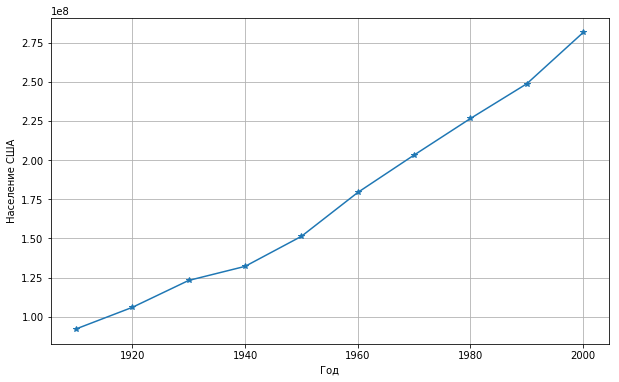

In [7]:
plt.plot(dates, populations, '*-')
plt.xlabel('Год')
plt.ylabel('Население США')
plt.grid()

Построить аппроксимацию на основе данных многочленов степеней N = 2, 3, 4, 5.
Какое представление является наилучшим?

$$a) f(x) = \sum\limits^N_{n=0}c_nx^n \ \ \
b)\ f(x) = \sum\limits^N_{n=0}c_n(x - 1910)^n$$

$$c) f(x) = \sum\limits^N_{n=0}c_n(x - 1955)^n \ \ \
d) f(x) = \sum\limits^N_{n=0}c_n((x - 1955) / 45)^n$$

# 2. Вывод формул

Поскольку нам придётся проводить аппроксимацию для 4 степеней, логично получить формулы в общем (матричном) виде

$$\large \begin{array}{rcl}\mathcal{L}\left(X, \vec{y}, \vec{w} \right) &=& \frac{1}{2n} \sum\limits_{i=0}^n \left(y_i - f(x_i)\right)^2 = \frac{1}{2n} \left(\vec{y} - X \vec{w}\right)^T \left(\vec{y} - X \vec{w}\right)
\end{array}$$

$$\large \begin{array}{rcl} \frac{\partial \mathcal{L}}{\partial \vec{w}} = \frac{\partial}{\partial \vec{w}} \frac{1}{2n} \left( \vec{y}^T \vec{y} -2\vec{y}^T X \vec{w} + \vec{w}^T X^T X \vec{w}\right)
= \frac{1}{2n} \left(-2 X^T \vec{y} + 2X^T X \vec{w}\right)
\end{array}$$

$$\large \begin{array}{rcl} \frac{\partial \mathcal{L}}{\partial \vec{w}} = 0 &\Leftrightarrow& \frac{1}{2n} \left(-2 X^T \vec{y} + 2X^T X \vec{w}\right) = 0 \\
&\Leftrightarrow& X^T X \vec{w} = X^T \vec{y} \\
&\Leftrightarrow& \vec{w} = \left(X^T X\right)^{-1} X^T \vec{y}
\end{array}$$

Однако вычислять обратную матрицу такого вида мы не будем, вместо этого воспользуемся $QR$ разложением $X = QR$, 

где $Q$ - ортогональная, а $R$ - верхнетреугольная матрица.
Тогда
$$\large \vec{w} = R^{-1} Q^T \vec{y}$$

А верхнетреугольная матрица уже обращается без проблем.

# 3. Практическая часть

In [4]:
# Функция, возвращающая матрицу X, использованную при выводе формул
def power_features(x, p, family):
    if family == 'a':
        return np.array([np.ones(len(x))] + list(map(lambda n: x**n, range(1, p + 1)))).T
    elif family == 'b':
        return np.array([np.ones(len(x))] + list(map(lambda n: (x-1910)**n, range(1, p + 1)))).T
    elif family == 'c':
        return np.array([np.ones(len(x))] + list(map(lambda n: (x-1955)**n, range(1, p + 1)))).T
    elif family == 'd':
        return np.array([np.ones(len(x))] + list(map(lambda n: ((x-1955)/45)**n, range(1, p + 1)))).T
    else:
        raise NameError('No such polinom family')

In [5]:
def polinomial_approx(p, family, x_train=dates, y_train=populations, x_test=dates_with_2010, plot=False):
    X = power_features(x_train, p, family)
    q, r = np.linalg.qr(X)
    w = np.dot(np.dot(np.linalg.inv(r), q.T), y_train)

    X_test = power_features(x_test, p, family)
    y_predicted = np.dot(w, X_test.T)
    if plot:
        plt.plot(x_test, y_predicted, '*-', label='degree %d, family %s' % (p, family))
    return y_predicted

[  9.34851591e+07   1.04831073e+08   1.19088594e+08   1.36016509e+08
   1.55373603e+08   1.76918664e+08   2.00410477e+08   2.25607829e+08
   2.52269506e+08   2.80154294e+08   3.09020979e+08]


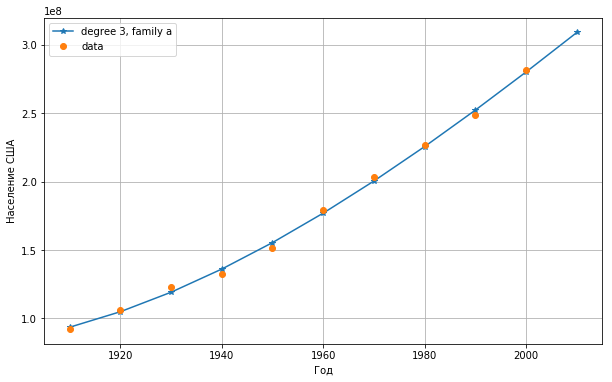

In [6]:
y_pred = polinomial_approx(3, 'a', plot=True)
print(y_pred)
plt.plot(dates, populations, 'o', label='data')
plt.xlabel('Год')
plt.ylabel('Население США')
plt.grid()
plt.legend();

In [8]:
rcParams['figure.figsize'] = 16, 10

Degree: 2, Family a, Loss: 9939695.511015
Degree: 2, Family b, Loss: 9939695.511042
Degree: 2, Family c, Loss: 9939695.511042
Degree: 2, Family d, Loss: 9939695.511042
Degree: 3, Family a, Loss: 8944668.738948
Degree: 3, Family b, Loss: 8944668.739275
Degree: 3, Family c, Loss: 8944668.739275
Degree: 3, Family d, Loss: 8944668.739275
Degree: 4, Family a, Loss: 8946627.629041
Degree: 4, Family b, Loss: 9361206.256903
Degree: 4, Family c, Loss: 9361206.256903
Degree: 4, Family d, Loss: 9361206.256903
Degree: 5, Family a, Loss: 9858896.743288
Degree: 5, Family b, Loss: 9509177.330138
Degree: 5, Family c, Loss: 32359393.372740
Degree: 5, Family d, Loss: 32359393.372740


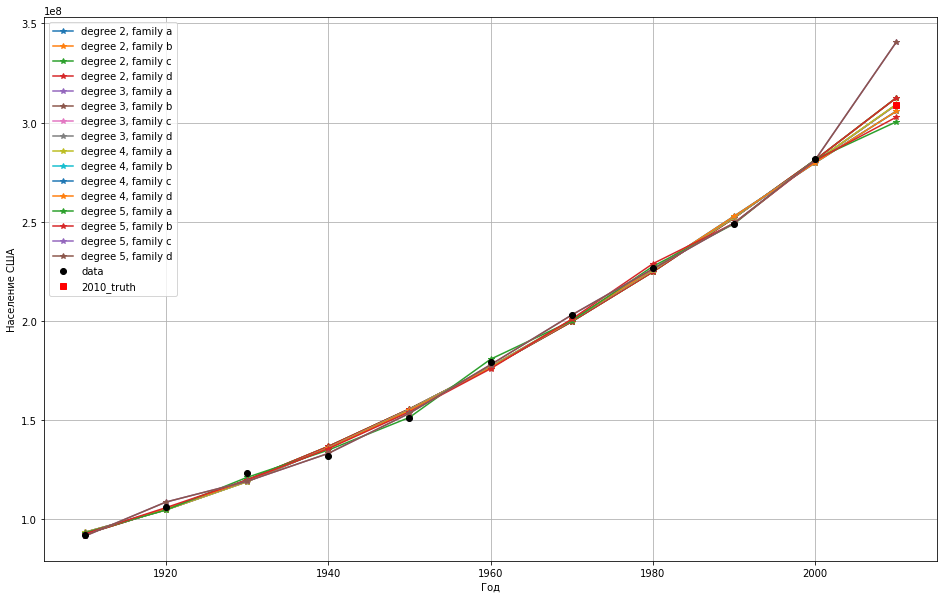

In [10]:
for degree in [2, 3, 4, 5]:
    for fam in ['a', 'b', 'c', 'd']:
        y_pred = polinomial_approx(degree, fam, plot=True)
        print('Degree: %d, Family %s, Loss: %f' % (degree, fam, np.linalg.norm(population_with_2010 - y_pred)))

plt.plot(dates, populations, 'o', color='black', label='data')
plt.plot(2010, 308745538, 'sr', label='2010_truth')
plt.xlabel('Год')
plt.ylabel('Население США')
plt.legend()
plt.grid()

Лучшее качество (хотя некоторые различия косметические) показала аппроксимация несмещёнными полиномами 4-ой степени. В целом почти все аппроксимации передали направление верно, только некоторые полиномы 5-ой степени слишком сильно сместились вверх.

Поскольку сейчас у нас есть данные даже до 2018 года, попробуем добавим ещё одну точку. Визуализируем только предсказанные данные.

Degree: 2, Family a, Loss: 11701445.689897
Degree: 2, Family b, Loss: 11701445.689994
Degree: 2, Family c, Loss: 11701445.689994
Degree: 2, Family d, Loss: 11701445.689994
Degree: 3, Family a, Loss: 4758763.128605
Degree: 3, Family b, Loss: 4758763.135876
Degree: 3, Family c, Loss: 4758763.135877
Degree: 3, Family d, Loss: 4758763.135877
Degree: 4, Family a, Loss: 5178068.977752
Degree: 4, Family b, Loss: 4321291.998949
Degree: 4, Family c, Loss: 4321291.998947
Degree: 4, Family d, Loss: 4321291.998947
Degree: 5, Family a, Loss: 14217206.144923
Degree: 5, Family b, Loss: 12078236.313355
Degree: 5, Family c, Loss: 105837726.008540
Degree: 5, Family d, Loss: 105837726.008539


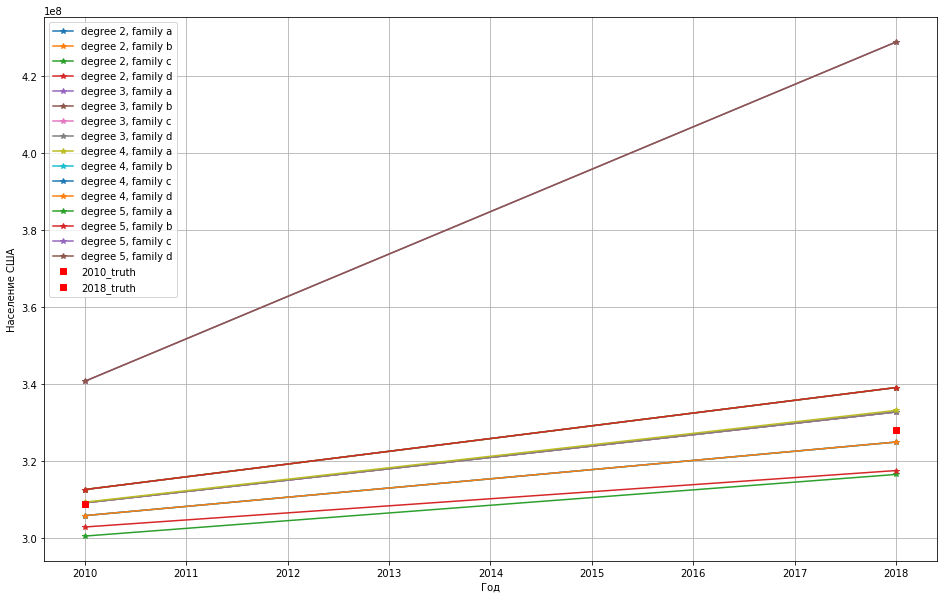

In [11]:
for degree in [2, 3, 4, 5]:
    for fam in ['a', 'b', 'c', 'd']:
        y_pred = polinomial_approx(degree, fam, 
                    x_test=np.array([2010, 2018]), plot=True)
        print('Degree: %d, Family %s, Loss: %f' % (degree, fam, 
                    np.linalg.norm(np.array([308745538, 327908413]) - y_pred)))

plt.plot(2010, 308745538, 'sr', label='2010_truth')
plt.plot(2018, 327908413, 'sr', label='2018_truth')
plt.xlabel('Год')
plt.ylabel('Население США')
plt.legend()
plt.grid()

Видно, что тенденция сохранилась (те же полиномы 5-ой степени сильно смещаются, остальные неплохо отражают зависимость). 
Теперь уже лучшее качество показали c и d 4-ой степени. Но отличия снова не так значительны.

В целом можно сделать вывод, что полиномы 3 и 4 степеней (все семейства) подходят для аппроксимации наших данных.